## 모듈

In [1]:
# matplotlib 한글 출력 가능하도록 만들기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
'''
# 데이터 크롤링 모듈
from selenium import webdriver
from bs4 import BeautifulSoup
import re
'''

'\n# 데이터 크롤링 모듈\nfrom selenium import webdriver\nfrom bs4 import BeautifulSoup\nimport re\n'

In [3]:
# 데이터 분석 모듈
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime

In [4]:
preseason_df=pd.read_csv('Pre_Season_Batter.csv')
regular_season_df=pd.read_csv('Regular_Season_Batter.csv')
print(preseason_df.shape)
display(preseason_df.head())

(1393, 29)


,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493


# 1. EDA(탐색적 데이터 분석)
## 정규시즌,프리시즌 데이터

### 1) 프리시즌과 정규시즌의 성적비교를 위해서 두 시즌 모두 경기에 참여한 선수들만 추출 후 상관관계를 도출 

In [5]:
#타자의 이름과 연도를 이용해 새로운 인덱스를 생성
regular_season_df['new_idx']=regular_season_df['batter_name']+regular_season_df['year'].apply(str)
preseason_df['new_idx']=preseason_df['batter_name']+preseason_df['year'].apply(str)

#새로운 인덱스의 교집합
intersection_idx=list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

#교집합에 존재하는 데이터만 불러오기
regular_season_new=regular_season_df.loc[regular_season_df['new_idx'].apply(lambda x:x in intersection_idx)]
regular_season_new=regular_season_new.sort_values(by='new_idx').reset_index(drop=True)

#비교를 위한 인덱스 정렬
preseason_new=preseason_df.loc[preseason_df['new_idx'].apply(lambda x:x in intersection_idx)]
preseason_new=preseason_new.sort_values(by='new_idx').reset_index(drop=True)

#검정코드
print(preseason_new.shape, preseason_new.shape)
sum(preseason_new['new_idx']==regular_season_new['new_idx'])

(1358, 30) (1358, 30)


1358

C:\Users\EBDL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


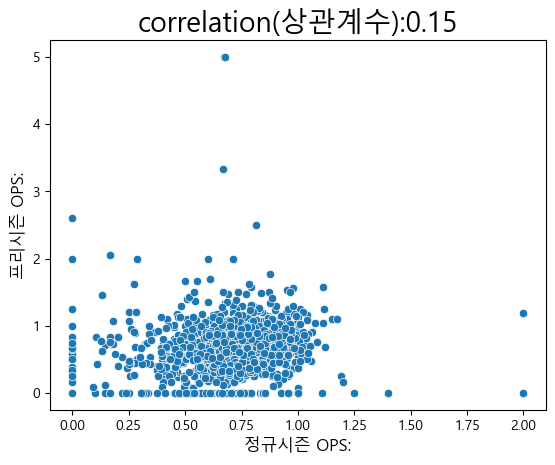

In [6]:
#정규시즌과 프리시즌의 상관관계 계산
correlation=regular_season_new["OPS"].corr(preseason_new["OPS"])
sns.scatterplot(regular_season_new["OPS"], preseason_new["OPS"])
plt.title('correlation(상관계수):'+str(np.round(correlation,2)), fontsize=20)
plt.xlabel('정규시즌 OPS:', fontsize=12)
plt.ylabel('프리시즌 OPS:', fontsize=12)
plt.show()

정규시즌과 프리시즌의 상관관계가 낮다

최종목적은 정규시즌의 성적예측이므로

### 프리시즌 데이터 제외하기로 판단

### 2) 몸무게와 장타율, 출루율간의 상관관계(OBP는 장타율, SLG는 출루율)

몸무게가 많이나가면 힘이 쌔므로 장타율이 높을것이다

적게나가면 가벼우므로 출루율이 높을 것이다 라는 가정 하에 확인

C:\Users\EBDL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\EBDL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


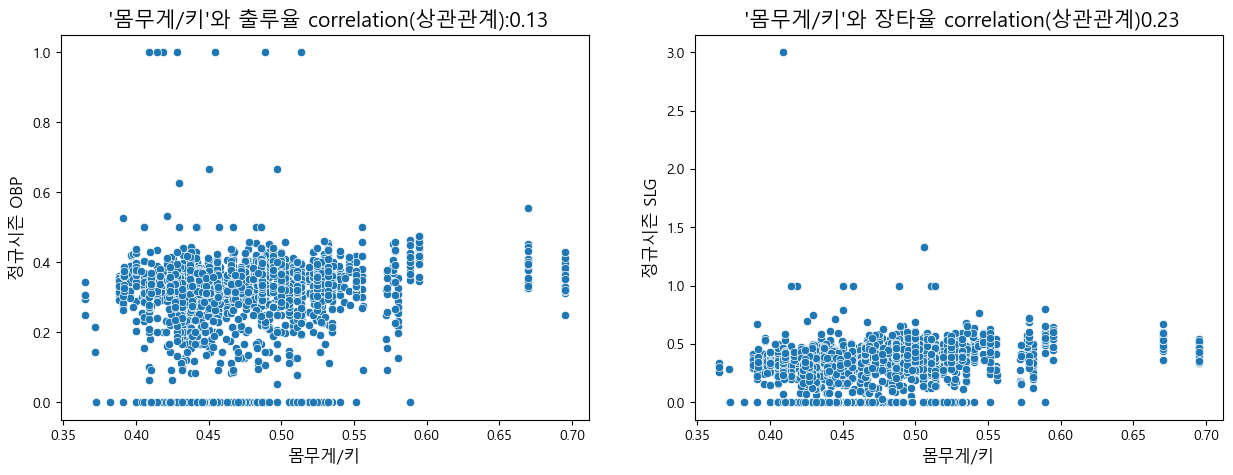

In [7]:
import re 
regular_season_df['weight']=regular_season_df['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x )

regular_season_df['height']=regular_season_df['height/weight'].apply(lambda x: int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x )

#몸무게/카 계산
regular_season_df['weight_per_height']=regular_season_df['weight']/ regular_season_df['height']
plt.figure(figsize=(15,5)) #그래프 조정
plt.subplot(1,2,1)

#비율과 출루율 상관관계
correlation= regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])
plt.title(" '몸무게/키'와 출루율 correlation(상관관계):"+str(np.round(correlation,2)),fontsize=15)
plt.ylabel('정규시즌 OBP', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)

#비율과 장타율 상관관계
plt.subplot(1,2,2)
correlation=regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'],regular_season_df['SLG'])
plt.title(" '몸무게/키'와 장타율 correlation(상관관계)"+str(np.round(correlation,2)), fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

분포가 고르게 되어있는 것을 알 수 있다.

몸무게와 키가 장타율, 출루율에 큰 영향을 끼치지 않는 것을 확인할 수 있다.

### 3) 외/내국인 차이 탐색

In [8]:
#career를 split
foreign_country = regular_season_df['career'].apply(lambda x:x.replace('-','').split(' ')[0])

#외국인만 추출
foreign_country_list= list(set(foreign_country.apply(lambda x:np.nan if '초' in x else x))) #초가 있으면 nan으로 처리하고 그게 아니라면 x출력
                                                                                              #nan이 1개인 이유 : set함수  
#결측치 처리 
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['도미니카삼성', '네덜란드', '쿠바', '미국', '캐나다', '도미니카']

In [9]:
regular_season_df['country']=foreign_country
regular_season_df['country']=regular_season_df['country'].apply(lambda x: x if pd.isnull(x) else ('foreign' if x in foreign_country_list else 'korean'))
regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


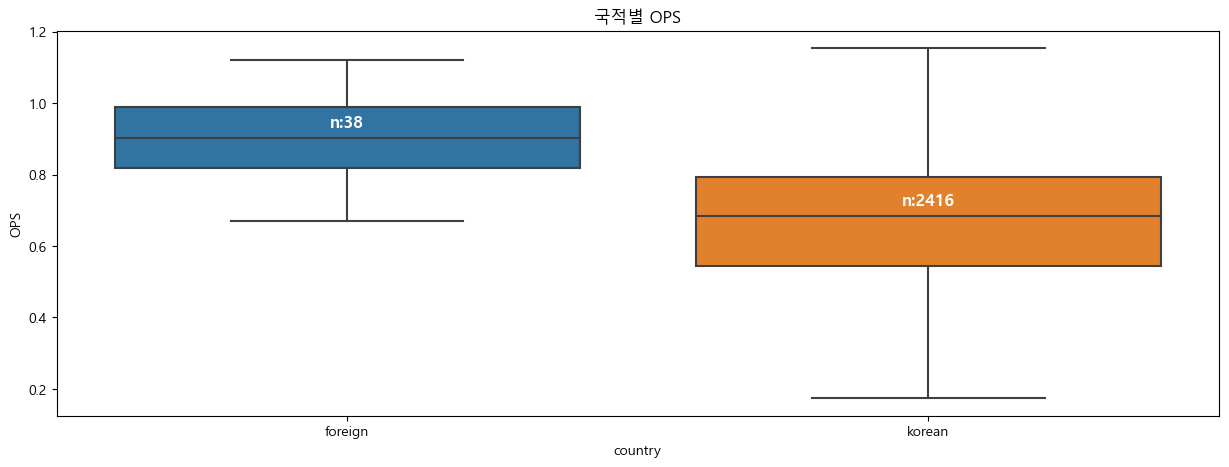

In [10]:
plt.figure(figsize=(15,5))
ax= sns.boxplot(x='country', y='OPS', data=regular_season_df, showfliers=False)

#국적별 OPS 중앙값 dict
median= regular_season_df.groupby(['country'])['OPS'].median().to_dict()

#내외국인 관측치 수
nobs = regular_season_df['country'].value_counts().to_dict()

#키 값을 n:값 형태로 변경
for key in nobs : nobs[key] = 'n:'+str(nobs[key]) #['foreign', 'korean']

#그래프의 Xticks text 값 얻기
xticks_labels=[item.get_text() for item in ax.get_xticklabels()]
for label in ax.get_xticklabels():
    ax.text(
    xticks_labels.index(label.get_text()),
        median[label.get_text()]+0.03,
        nobs[label.get_text()],
        horizontalalignment='center', size='large', color='w', weight='semibold')
ax.set_title('국적별 OPS')
plt.show()

내국인보다 외국인의 성적이 더 좋은것을 확인할 수 있었다.

그러나 외국인 데이터가 너무 적어 noise를 발생시킬 확률이 크다고 판단 하여 제거할 예정

## 일별데이터

In [11]:
day_by_day_df=pd.read_csv('Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())

(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


In [12]:
#날짜(date)를 '.'을 기준으로 나누고 첫 번째 값을 월(month)로 지정
day_by_day_df['month']=day_by_day_df['date'].apply(lambda x:str(x).split('.')[0]) #숫자는 split 안됨, str로 변경 후 사용

#각 연도의 월별 평균 누적 타율(avg2) 계산
agg_df= day_by_day_df.groupby(['year','month']).mean().reset_index()
agg_df

#피벗 데이블로 재구성하기
agg_df=day_by_day_df.pivot_table(index='month', columns='year', values='avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


### 1)연도별 평균 타율

연도가 지날수록 타율이 상향평준화 되는 것을 알 수 있다.

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


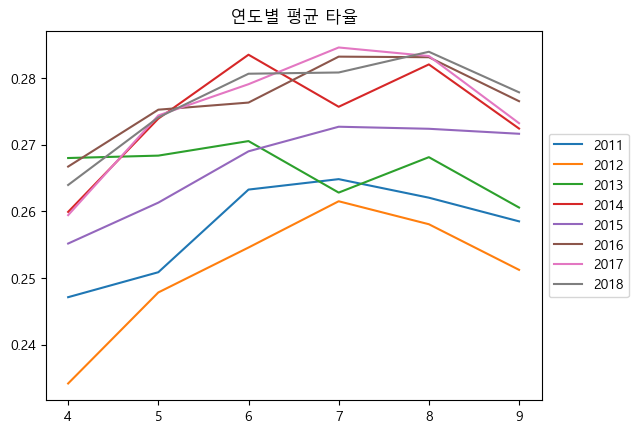

In [13]:
#그래프의 간소화를 위해 결측치가 있는 3월과 10월제외한다.
display(agg_df.iloc[2:,10:])
plt.plot(agg_df.iloc[2:,10:]) #2011~2018년도
plt.legend(agg_df.iloc[2:,10:].columns, loc='center left', bbox_to_anchor=(1,0.5)) #범례 그래프 밖에 위치
plt.title('연도별 평균 타율')
plt.show()

### 결측값 확인

<AxesSubplot:>

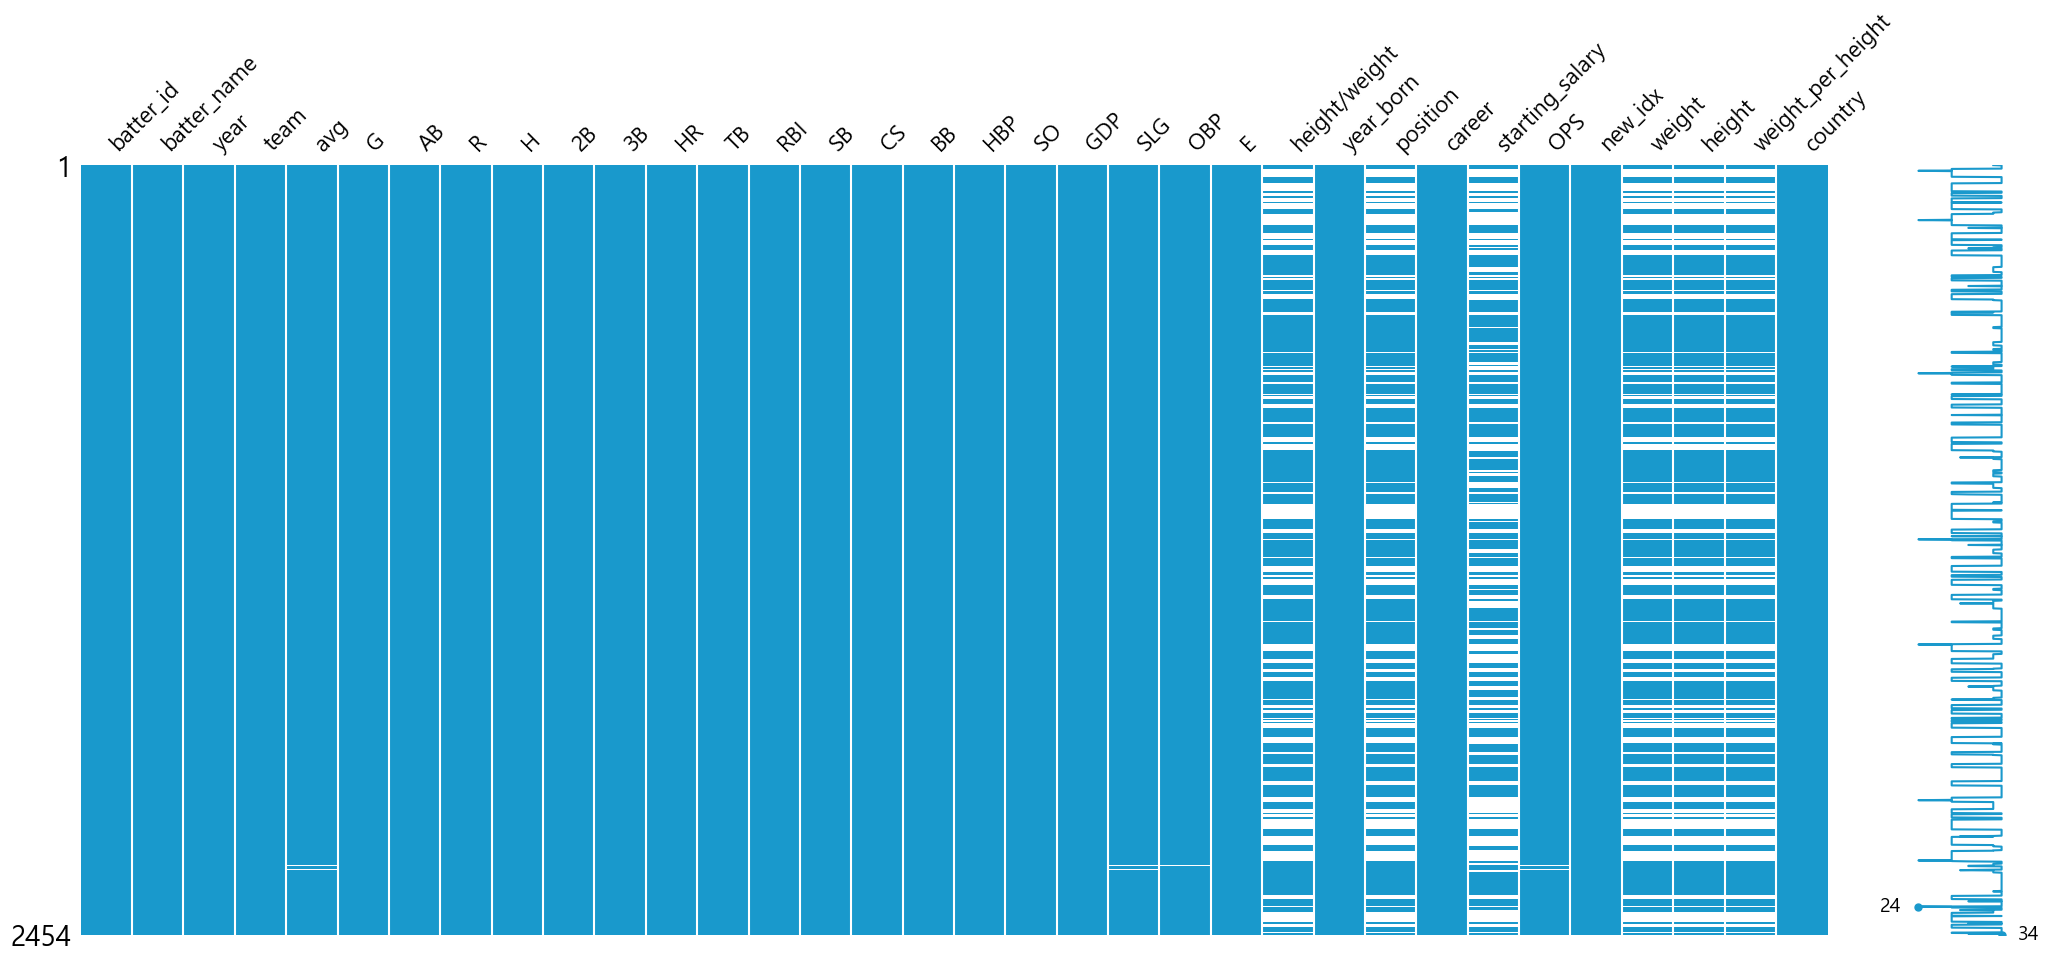

In [14]:
import missingno as msno
msno.matrix(df=regular_season_df.iloc[:, :], color=(0.1, 0.6, 0.8))

## 크롤링

필요없는 피처들도 많고 결측값도 많은 것을 확인하여 크롤링을 통해 보다 정확한 데이터를 수집하기로 결정

In [15]:
submission = pd.read_csv("submission.csv")
reg = pd.read_csv("Regular_Season_Batter.csv")

In [16]:
'''
# 가상 웹드라이버 불러오기
# chromedriver.exe가 크롬 버젼에 맞게 설치 되어 있어야 함
driver = webdriver.Chrome('chromedriver.exe')
'''

"\n# 가상 웹드라이버 불러오기\n# chromedriver.exe가 크롬 버젼에 맞게 설치 되어 있어야 함\ndriver = webdriver.Chrome('chromedriver.exe')\n"

In [17]:
'''
# 크롤링
for i in range(86):
    
    # 1982년 부터 2018년 까지 statiz에 기록된 선수들 필터링 (총 8558명)
    url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2018&sn=100&pa={}'.format(i*100)
    
    driver.get(url)
    driver.implicitly_wait(5)
    
    html = driver.find_element_by_xpath('//*[@id="mytable"]/tbody').get_attribute("innerHTML") #기록 table을 str형태로 저장
    soup = BeautifulSoup(html, 'html.parser') #str 객체를 BeautifulSoup 객체로 변경
    
    temp = [i.text.strip() for i in soup.findAll("tr")] #tr 태그에서, text만 저장하기
    temp = pd.Series(temp) #list 객체에서 series 객체로 변경
    
    #'순'이나 'W'로 시작하는 row 제거
    # 즉, 선수별 기록만 남기고, index를 reset 해주기
    temp = temp[~temp.str.match("[순W]")].reset_index(drop=True) 
    
    temp = temp.apply(lambda x: pd.Series(x.split(' '))) #띄어쓰기 기준으로 나눠서 dataframe으로 변경
    
    #선수 팀 정보 이후 첫번째 기록과는 space 하나로 구분, 그 이후로는 space 두개로 구분이 되어 있음 
    #그래서 space 하나로 구분을 시키면, 빈 column들이 존재 하는데, 해당 column들 제거 
    temp = temp.replace('', np.nan).dropna(axis=1) 
    
    #WAR 정보가 들어간 column이 2개 있다. (index가 1인 column과, 제일 마지막 column)
    #그 중에서 index가 1인 columm 제거 
    temp = temp.drop(1, axis=1)
    
    #선수 이름 앞의 숫자 제거
    temp[0] = temp[0].str.replace("^\d+", '')

    # 선수들의 생일 정보가 담긴 tag들 가지고 오기
    birth = [i.find("a") for i in soup.findAll('tr') if 'birth' in i.find('a').attrs['href']]
    
    # tag내에서, 생일 날짜만 추출하기 
    p = re.compile("\d{4}\-\d{2}\-\d{2}")
    birth = [p.findall(i.attrs['href'])[0] for i in birth]
    
    # 생일 column 추가
    temp['생일'] = birth
    
    # page별 완성된 dataframe을 계속해서 result에 추가 시켜주기 
    if i == 0:
        result = temp
    else:
        result = result.append(temp)
        result = result.reset_index(drop=True)
        
    print(i, "완료")
        
#column 명 정보 저장        
columns = ['선수'] + [i.text for i in soup.findAll("tr")[0].findAll("th")][4:-3] + ['타율', '출루', '장타', 'OPS', 'wOBA', 'wRC+', 'WAR+', '생일']

#column 명 추가
result.columns = columns

#webdriver 종료
driver.close()

print("최종 완료")
'''

'\n# 크롤링\nfor i in range(86):\n    \n    # 1982년 부터 2018년 까지 statiz에 기록된 선수들 필터링 (총 8558명)\n    url = \'http://www.statiz.co.kr/stat.php?mid=stat&re=0&ys=1982&ye=2018&sn=100&pa={}\'.format(i*100)\n    \n    driver.get(url)\n    driver.implicitly_wait(5)\n    \n    html = driver.find_element_by_xpath(\'//*[@id="mytable"]/tbody\').get_attribute("innerHTML") #기록 table을 str형태로 저장\n    soup = BeautifulSoup(html, \'html.parser\') #str 객체를 BeautifulSoup 객체로 변경\n    \n    temp = [i.text.strip() for i in soup.findAll("tr")] #tr 태그에서, text만 저장하기\n    temp = pd.Series(temp) #list 객체에서 series 객체로 변경\n    \n    #\'순\'이나 \'W\'로 시작하는 row 제거\n    # 즉, 선수별 기록만 남기고, index를 reset 해주기\n    temp = temp[~temp.str.match("[순W]")].reset_index(drop=True) \n    \n    temp = temp.apply(lambda x: pd.Series(x.split(\' \'))) #띄어쓰기 기준으로 나눠서 dataframe으로 변경\n    \n    #선수 팀 정보 이후 첫번째 기록과는 space 하나로 구분, 그 이후로는 space 두개로 구분이 되어 있음 \n    #그래서 space 하나로 구분을 시키면, 빈 column들이 존재 하는데, 해당 column들 제거 \n    temp = temp.replace(\'

In [18]:
#result.shape

In [19]:
#결과값 저장해두기
#result.to_csv("statiz_origin.csv")

In [20]:
result = pd.read_csv("statiz_origin.csv")
result.head()

,Unnamed: 0,선수,G,타석,타수,득점,안타,2타,3타,홈런,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+,생일
0,0,이종범94해SS,124,561,499,113,196,27,5,19,...,1,4,0.393,0.452,0.581,1.033,0.462,198.3,11.77,1970-08-15
1,1,테임즈15N1B,142,595,472,130,180,42,5,47,...,0,7,0.381,0.498,0.790,1.288,0.530,222.3,10.71,1986-11-10
2,2,심정수03현RF,133,601,460,110,154,16,1,53,...,0,8,0.335,0.478,0.720,1.197,0.498,210.7,10.19,1975-05-05
3,3,이종범97해SS,125,577,484,112,157,28,3,30,...,0,3,0.324,0.428,0.581,1.009,0.431,173.2,9.70,1970-08-15
4,4,이종범96해SS,113,525,449,94,149,28,1,25,...,0,2,0.332,0.425,0.566,0.991,0.440,184.6,9.52,1970-08-15


# 2. 크롤링 데이터 전처리

데이터 확인 결과 기존 제공 데이터와 유사하고, 결측치가 더 적고 추가적인 피처가 존재함을 확인하였다.

### 선수정보

In [21]:
# 이름 분리 해서, '이름' column 추가
result['이름'] = result['선수'].str.findall("^[ㄱ-힣]+").apply(lambda x: x[0])

# 기존 '선수' column 에 있던 이름 정보 제거
result['선수'] = result.apply(lambda x: x['선수'].replace(x['이름'], ''), axis=1)

In [22]:
# '시즌' column 생성
result['시즌'] = result['선수'].apply(lambda x: x[:2])

# 기존 '선수' column 에 있던 시즌 정보 제거
result['선수'] = result.apply(lambda x: x['선수'].replace(x['시즌'],''), axis=1)

# 년도를 4자리 숫자로 바꾸어주기 ex) 13년을 2013년으로
result['시즌'] = result['시즌'].apply(lambda x: int("20"+ x) if int(x)<80 else int("19"+x))

In [23]:
result.head()

,Unnamed: 0,선수,G,타석,타수,득점,안타,2타,3타,홈런,...,타율,출루,장타,OPS,wOBA,wRC+,WAR+,생일,이름,시즌
0,0,해SS,124,561,499,113,196,27,5,19,...,0.393,0.452,0.581,1.033,0.462,198.3,11.77,1970-08-15,이종범,1994
1,1,N1B,142,595,472,130,180,42,5,47,...,0.381,0.498,0.790,1.288,0.530,222.3,10.71,1986-11-10,테임즈,2015
2,2,현RF,133,601,460,110,154,16,1,53,...,0.335,0.478,0.720,1.197,0.498,210.7,10.19,1975-05-05,심정수,2003
3,3,해SS,125,577,484,112,157,28,3,30,...,0.324,0.428,0.581,1.009,0.431,173.2,9.70,1970-08-15,이종범,1997
4,4,해SS,113,525,449,94,149,28,1,25,...,0.332,0.425,0.566,0.991,0.440,184.6,9.52,1970-08-15,이종범,1996


In [24]:
# 포지션
position = ['1B', '2B', '3B', 'SS', 'C', 'RF', 'LF', 'CF', 'DH'] 

# 포지션 여부 확인
result['포지션여부'] = result['선수'].apply(lambda x : (np.isin(x[-2:], position) or np.isin(x[-1:], position))) 

# 포지션 분리
result['포지션'] = result['선수'].apply(lambda x: x[-2:] if x[-2:] in position else x[-1:])

#포지션이 기록 되어 있지 않으면, nan값 넣기 
result.loc[result['포지션여부']==False, '포지션'] = np.nan

In [25]:
#statiz 사이트에, 2015시즌 조홍석 데이터에 생일이 기록 안되어 있음, 해당 시즌의 생일 추가 
result.loc[(result.이름 =='조홍석'),'생일']

3476    1990-02-23
6466    1990-02-23
6855    1990-02-23
7873    1990-02-23
Name: 생일, dtype: object

In [26]:
result.loc[(result.이름 =='조홍석')&(result.시즌 ==2015),'생일'] = '1990-02-23'

In [27]:
result[(result.이름 =='조홍석')&(result.시즌 ==2015)].생일

6466    1990-02-23
Name: 생일, dtype: object

In [28]:
# 팀 & 나이 column 생성
result['팀'] = result.apply(lambda x: x['선수'].replace(x['포지션'],'') if type(x['포지션'])==str else x['선수'], axis=1)
result['나이'] = result.apply(lambda x: x['시즌'] - int(x['생일'][:4]) + 1, axis=1)

In [29]:
# 선수별 고유 아이디 부여
info = result[['이름', '생일']].apply(lambda x: tuple(x), axis=1)

player_id = {}
for i,j in enumerate(info.unique()):
    player_id[j] = i
    
result['ID'] = result.apply(lambda x: player_id[tuple([x['이름'], x['생일']])], axis=1)

In [30]:
# 개명한 선수 이름 확인
submission[~np.isin(submission['batter_name'], result['이름'])]

,batter_id,batter_name
93,136,백민기
129,195,윤수강
209,326,한동민


In [31]:
# 개명한 이름 변경
result['이름'] = result['이름'].replace("윤여운", "윤수강").replace('백동훈', '백민기').replace('한유섬','한동민')

In [32]:
submission[~np.isin(submission['batter_name'], result['이름'])] #이름이 바뀐 선수가 없음을 확인할 수 있었다.

,batter_id,batter_name


In [33]:
result=result.drop('선수',axis=1) #선수의 이름을 바탕으로 여러 피처들을 만들어내어 '선수' 피처 삭제

In [34]:
# numeric data로 변환
float_columns = result.iloc[:,1:27].columns
result[float_columns] = result[float_columns].astype(float).fillna(0)

In [35]:
# 필요한 features 선택
cols = ['ID', '이름', '생일', '팀', '시즌', '포지션', '나이'] + list(float_columns)
result = result[cols]

# 3. 크롤링 데이터 EDA

In [36]:
print("<전체 column 타입확인>\n\n",result.dtypes.value_counts())
print()
print("<object type columns>\n\n",result.columns[result.dtypes=='object'])

<전체 column 타입확인>

 float64    26
object      4
int64       3
dtype: int64

<object type columns>

 Index(['이름', '생일', '팀', '포지션'], dtype='object')


#### 상관성 분석

In [37]:
correlations = result.corr()['OPS'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(11))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 타수      0.605570
안타      0.607197
타석      0.607948
루타      0.609291
G       0.629072
wRC+    0.840112
출루      0.903542
wOBA    0.940022
타율      0.967632
장타      0.982628
OPS     1.000000
Name: OPS, dtype: float64

Most Negative Correlations:
 ID   -0.588437
시즌   -0.092120
나이    0.178932
희타    0.283358
도루    0.318930
고4    0.343673
3타    0.353387
도실    0.380534
사구    0.452546
희비    0.466973
Name: OPS, dtype: float64


#### 히트맵

C:\Users\EBDL\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\EBDL\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


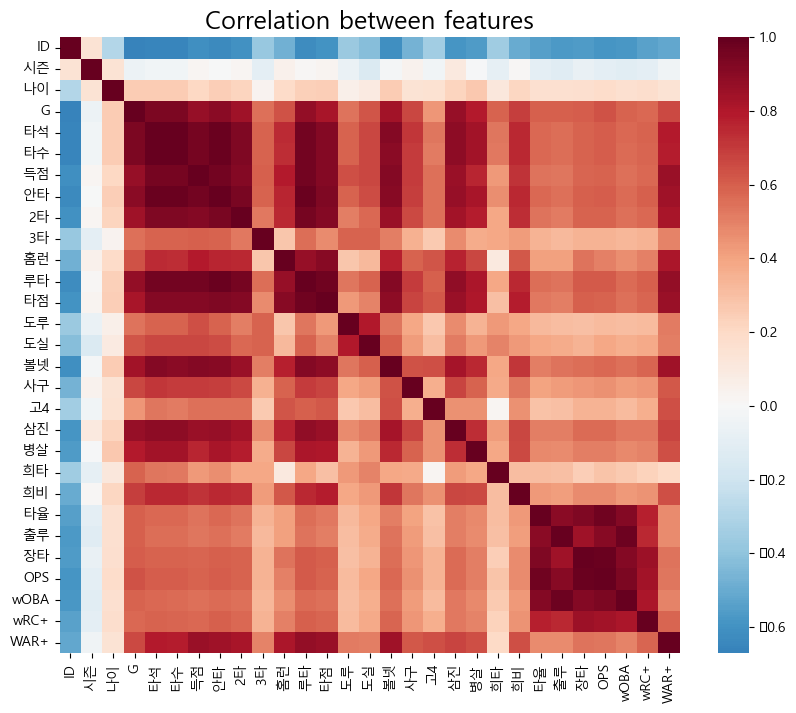

In [38]:
# 특성별 상관계수 heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(result.corr(), annot=False, fmt='.2f',
            cmap='RdBu_r', center=0)
plt.title('Correlation between features', fontsize=18)
plt.show()

#### OPS와 높은 상관관계
- 장타, 타율, wOBA, 출루, wRC+, G,루타, 타석,안타

#### OPS와 낮은 상관관계
- 나이, 희타, 도루, 고4, 3타, 도실, 사구, 희비

Text(0.5, 1.0, 'OPS와 상관성이 높은 피처 TOP 10')

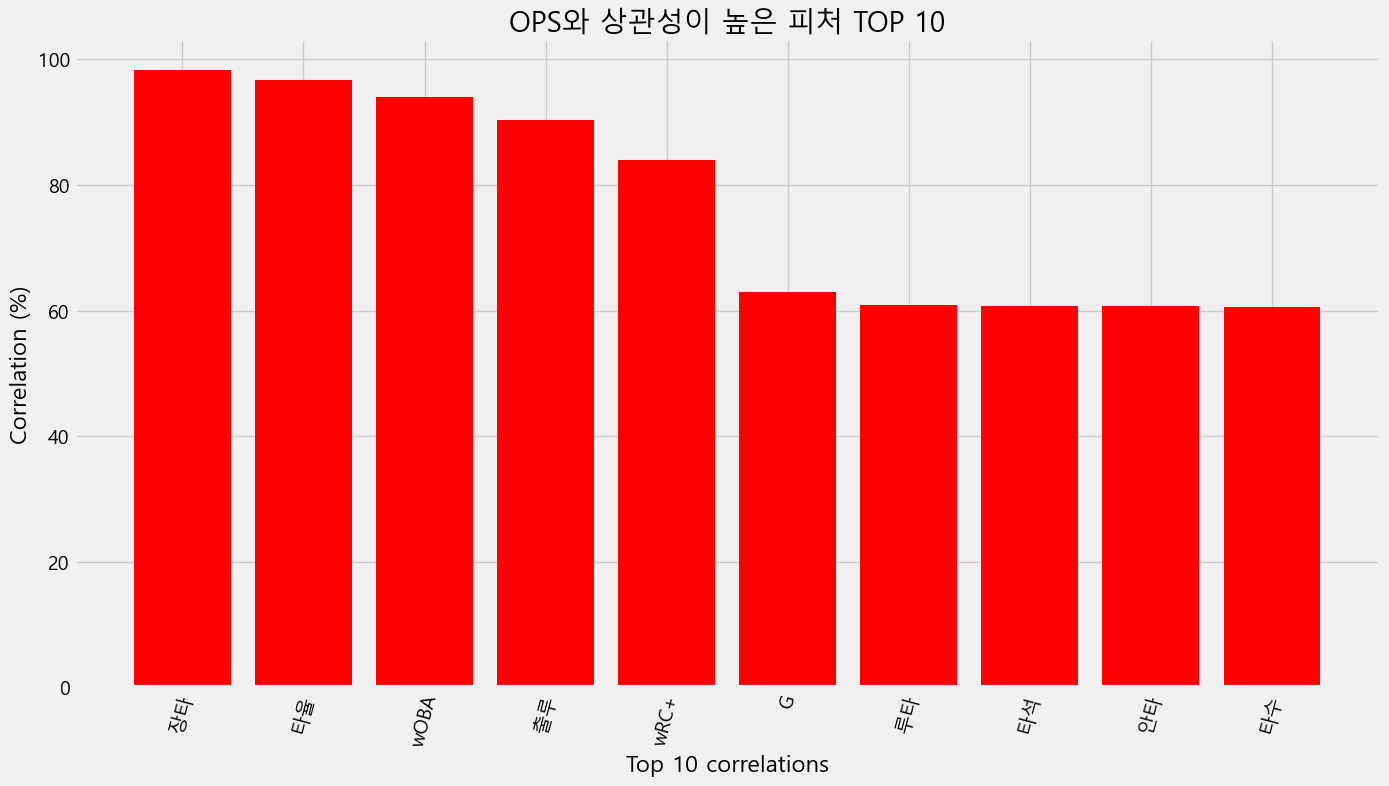

In [39]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))

plt.bar(correlations.tail(11)[:-1].index.astype(str)[::-1], 100*correlations.tail(11)[:-1][::-1],color='r')

# Plot labeling
plt.xticks(rotation=75) ; plt.xlabel('Top 10 correlations'); plt.ylabel('Correlation (%)');
plt.title('OPS와 상관성이 높은 피처 TOP 10')

Text(0.5, 1.0, 'OPS와 상관성이 낮은 피처 TOP 10')

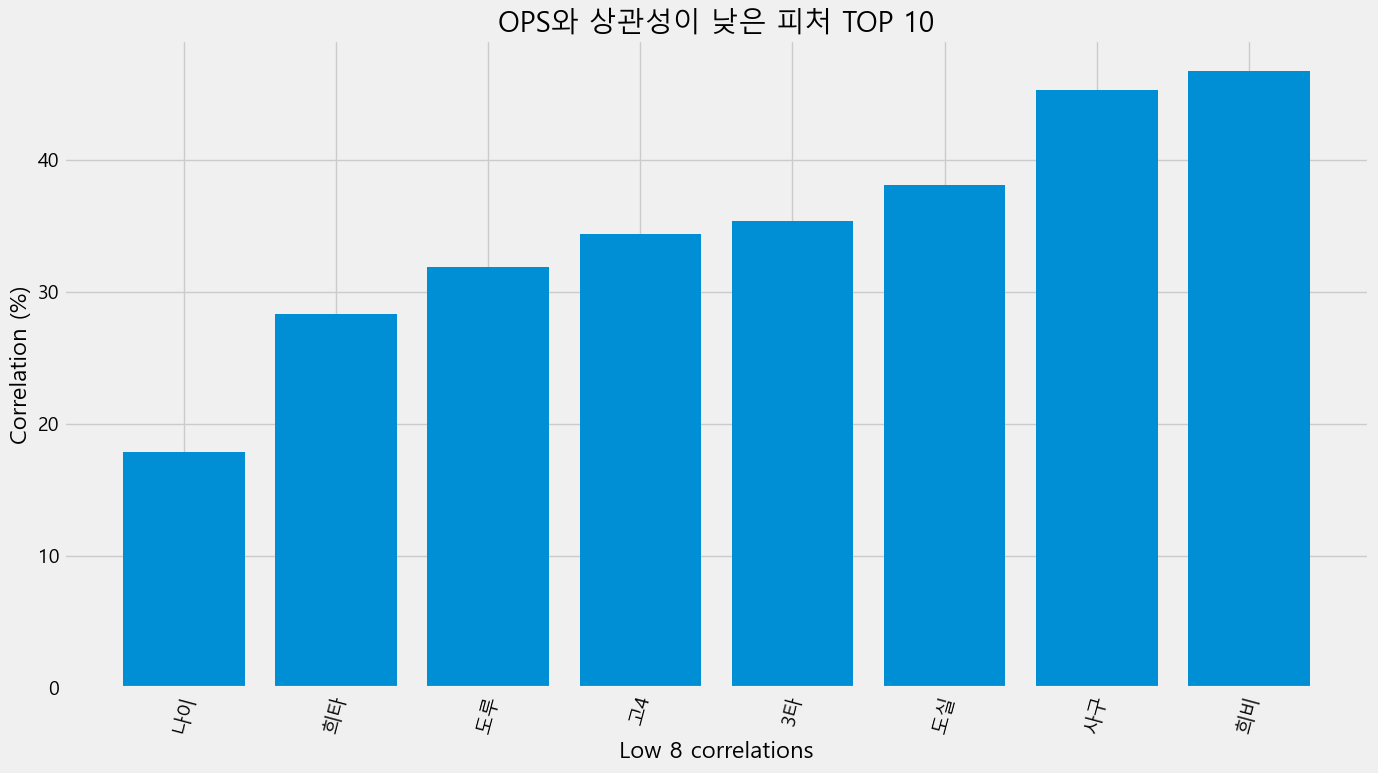

In [40]:
plt.figure(figsize=(15,8))

plt.bar(correlations.head(10)[2:].index.astype(str), 100*correlations.head(10)[2:])

# Plot labeling
plt.xticks(rotation=75) ; plt.xlabel('Low 8 correlations'); plt.ylabel('Correlation (%)')
plt.title('OPS와 상관성이 낮은 피처 TOP 10')

OPS와 상관성 높은 상위 5개의 PairPlot


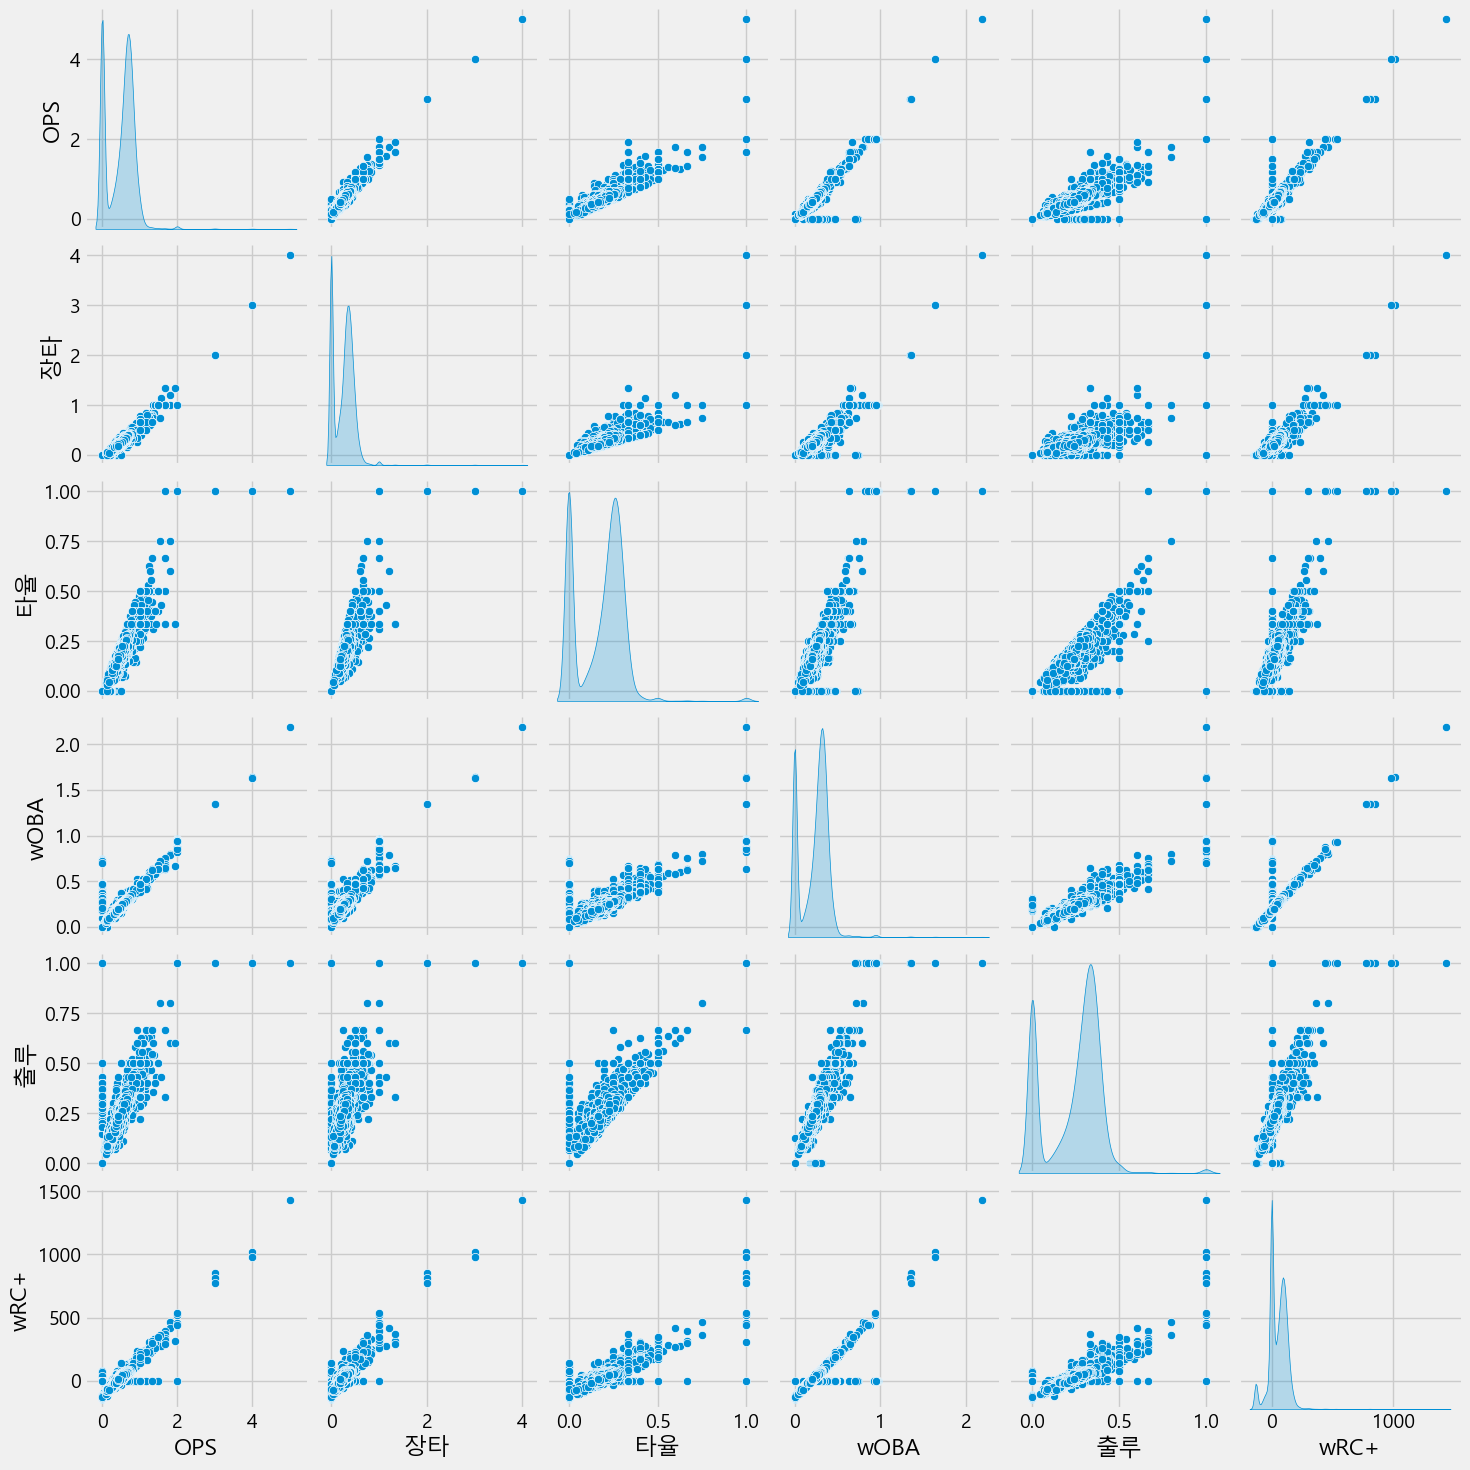

In [41]:
print("OPS와 상관성 높은 상위 5개의 PairPlot")
high_corr = result.loc[:,list(correlations.tail(6)[::-1].index)]
sns.pairplot(high_corr,diag_kind='kde')
plt.show()

- OPS와 선형성을 보이는 변수들이 있음

OPS와 상관성 낮은 상위 5개의 PairPlot


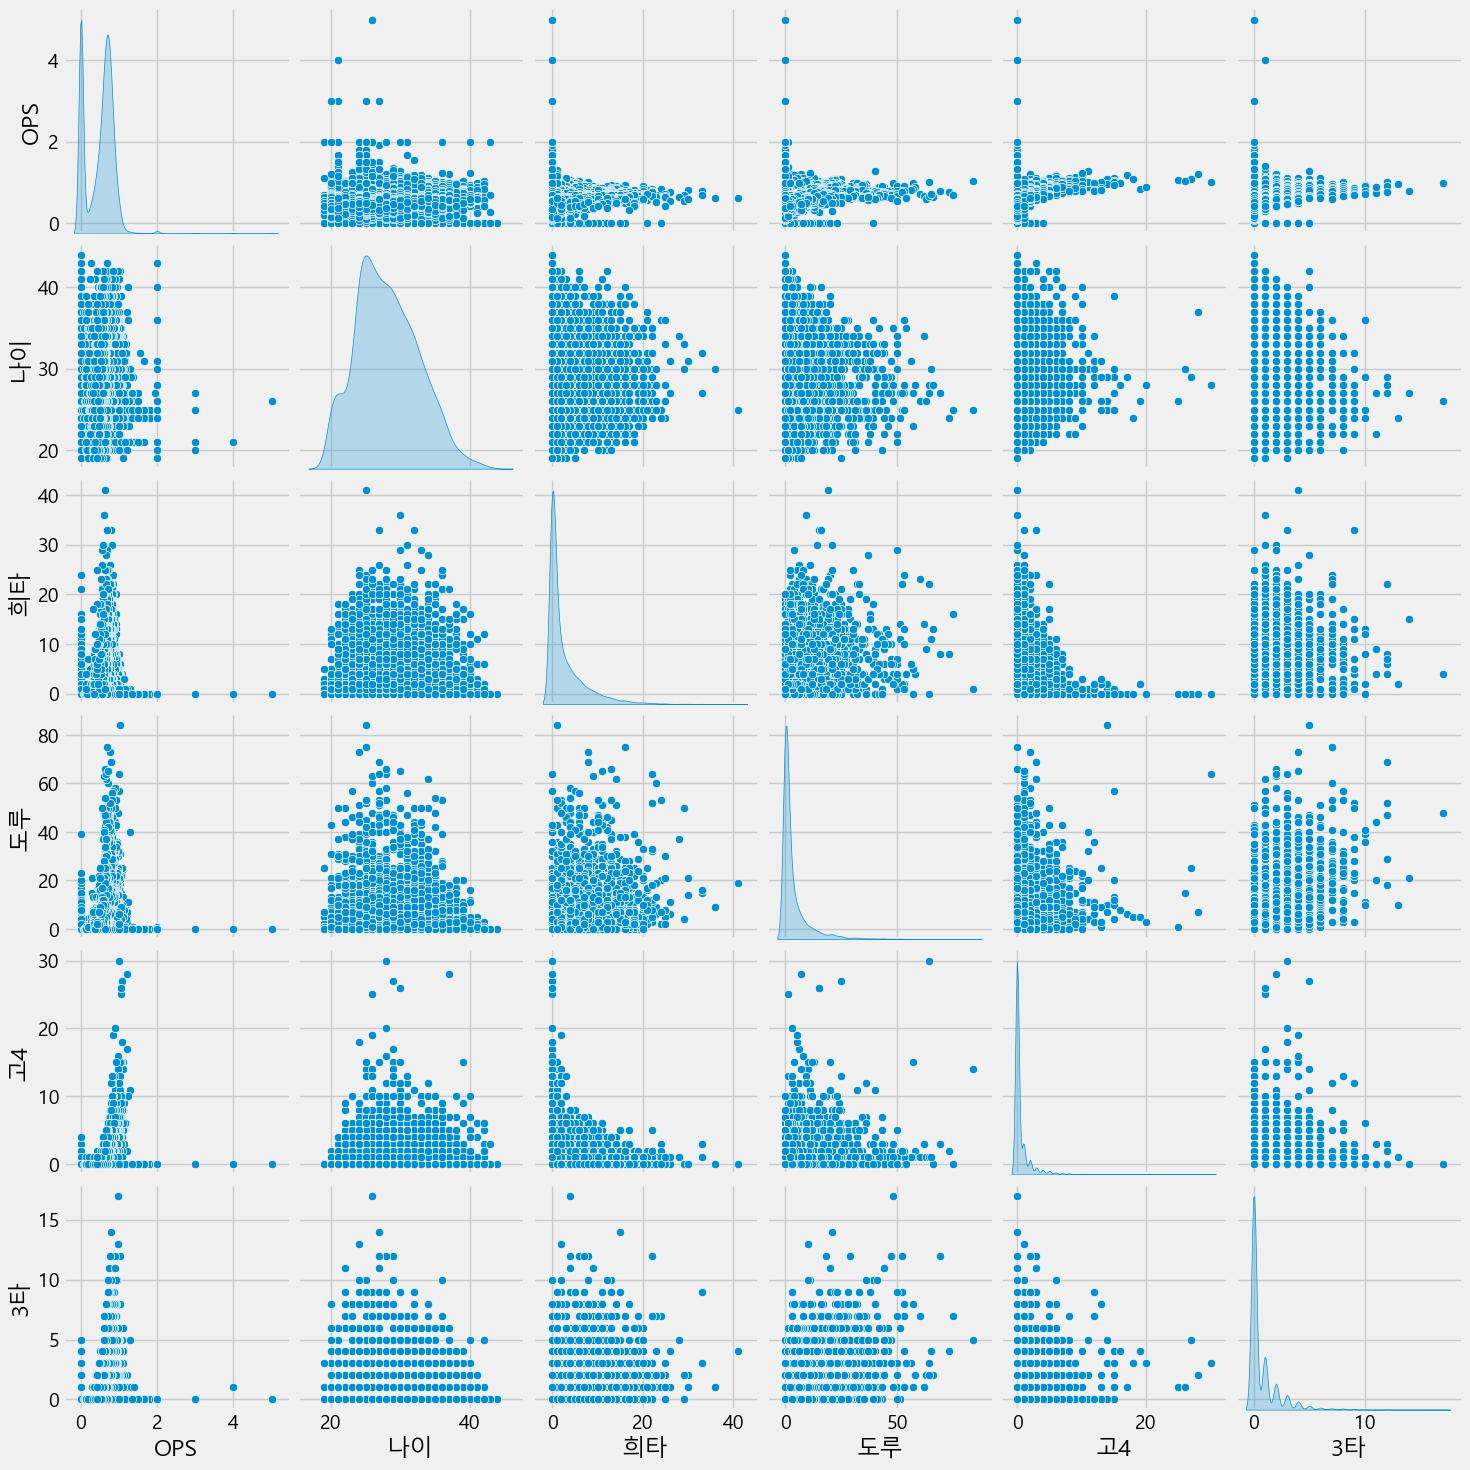

In [42]:
print("OPS와 상관성 낮은 상위 5개의 PairPlot")
low_corr = result.loc[:,['OPS']+list(correlations.head(7)[2:].index)]
sns.pairplot(low_corr,diag_kind='kde')
plt.show()

- OPS의 분포는 좁은 것에 비해서 상관성이 낮은 변수들은 분포가 넓음 (OPS 예측에 큰 도움이 안됨)

In [43]:
# dtype이 object인 것과 OPS 추출
result_obj=result.loc[:,list(result.columns[result.dtypes=='object'])+['OPS']]

Text(0.5, 1.0, '포지션별 OPS violinplot')

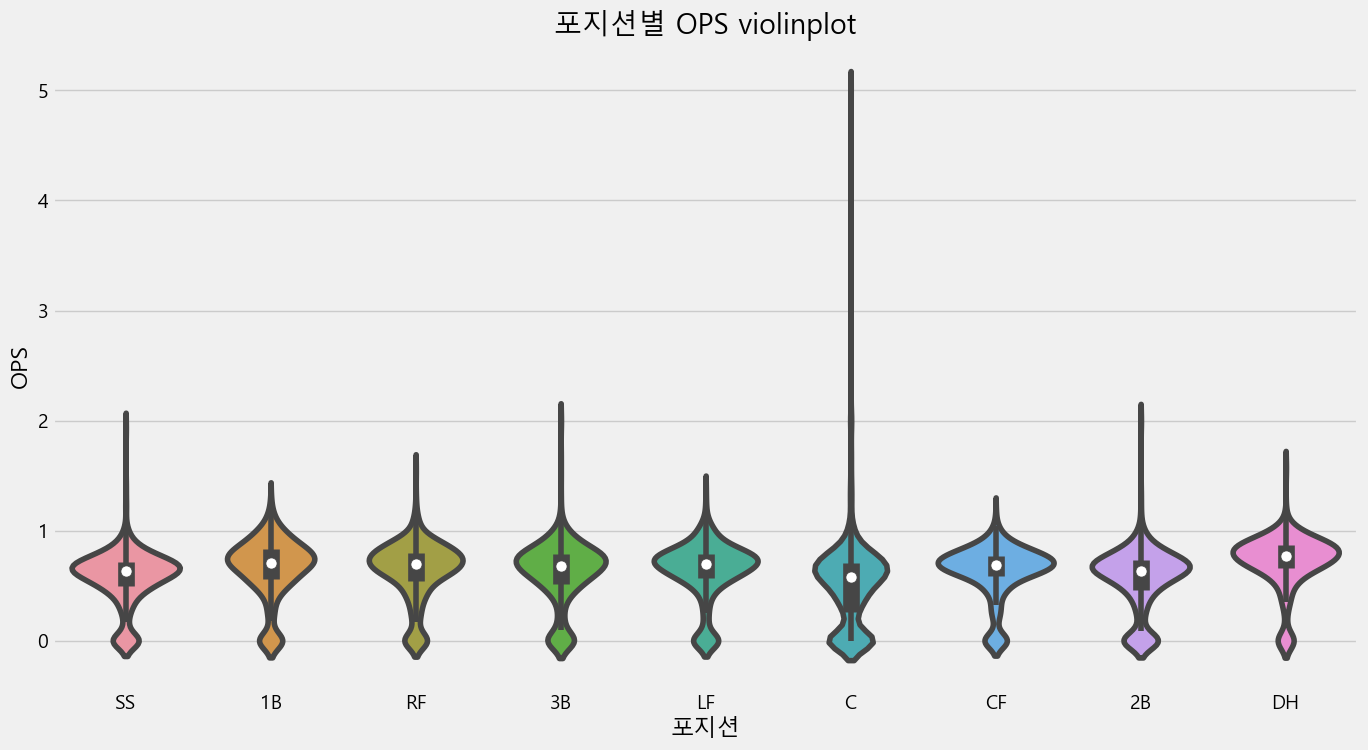

In [44]:
# 포지션별 OPS violinplot 그려보기
plt.figure(figsize=(15,8))
sns.violinplot(x='포지션',y='OPS',data=result_obj)
plt.title("포지션별 OPS violinplot")

- violinplot: Box plot(분위수 확인)과 KDE plot(데이터의 분포 확인)을 동시에 할 수 있다
- C (포수) 포지션의 경우 다른 포지션에 비해서 outlier가 매우 큰 선수가 있는 것으로 보인다.

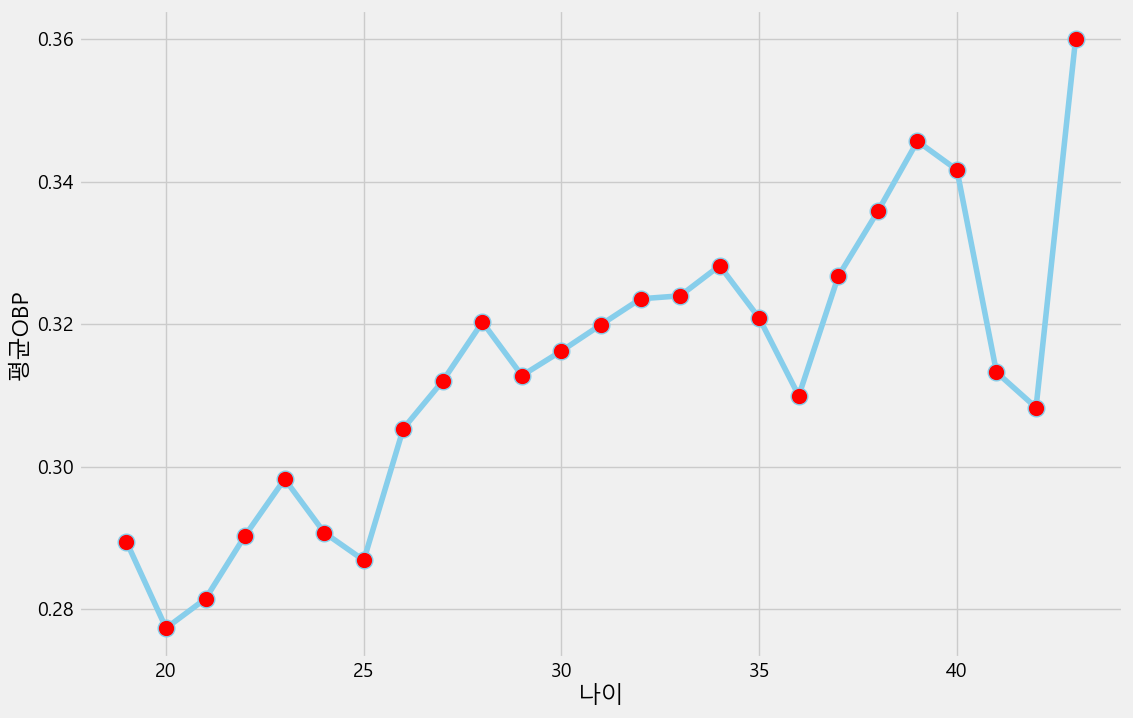

In [45]:
#나이,평균 출루율,출루율 중앙값으로 구성된 데이터프레임 구축
temp_df=result.loc[result['타수']>=30].groupby('나이').agg({'출루':['mean','median']}).reset_index()
temp_df.columns= temp_df.columns.droplevel()
temp_df.columns=['age','mean_OBP','median_OBP']

#나이에 따른 출루율 시각화
plt.figure(figsize=(12,8))
plt.plot('age','mean_OBP', data=temp_df, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)
plt.ylabel('평균OBP')
plt.xlabel('나이')
plt.show()

### EDA 결과

#### 1. 상관관계
    OPS와 높은 상관관계
    -  장타, 타율, wOBA, 출루, wRC+, G,루타, 타석,안타
    OPS와 낮은 상관관계
     - 나이, 희타, 도루, 고4, 3타, 도실, 사구, 희비
    임을 알 수 있었으나, wOBA는 OPS의 단점을 보완한 지표, OPS = 장타 + 출루 이기에,  wOBA,장타,출루, OPS는 관련성이 높을 수 밖에 없다.
#### 2. 포지션별 OPS의 차이는 크지 않은 것을 볼 수 있고, 이상치가 존재함을 확인할 수 있었다.
#### 3. 나이가 OPS의 큰 영향을 미칠것이라 예상하였지만 예상과 다름을 확인할 수 있었다.

# 4. 피처 엔지니어링

### 결측값 처리

In [46]:
import missingno as msno

In [47]:
def resumetable(df): # 데이터의 요약정보를 보여주는 summary를 생성 
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary['결측값 개수'] = df.isna().sum()
    summary['고윳값 개수'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns: 
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary

In [48]:
summary = resumetable(result)
summary[summary['결측값 개수']!=0]
#포지션을 제외하고는 결측값이 없는것으로 판단됨

데이터 세트 형상: (8557, 33)


,데이터 타입,결측값 개수,고윳값 개수,데이터 종류
포지션,object,2394,9,None


<AxesSubplot:>

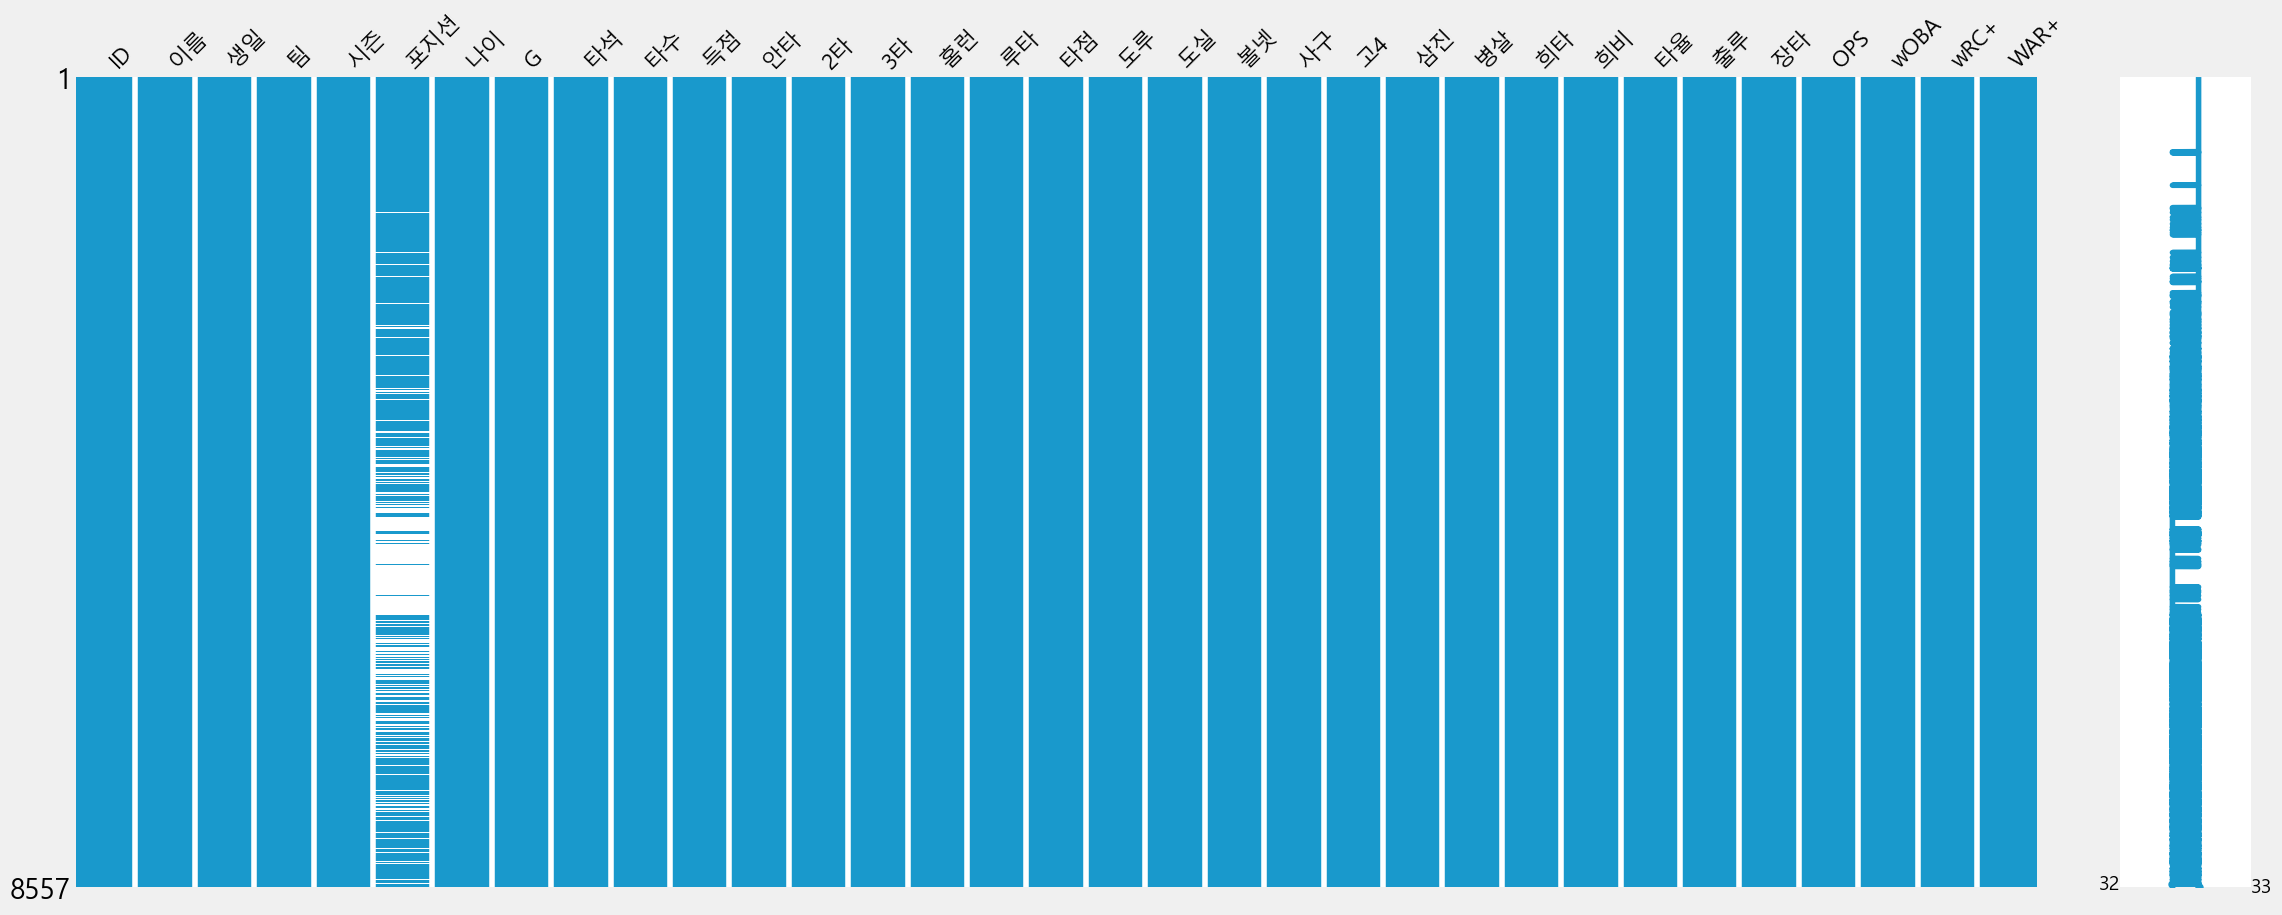

In [49]:
msno.matrix(df=result.iloc[:, :], color=(0.1, 0.6, 0.8))

### 타수이 30미만인 데이터 제거

30타수 이상이 되면 선수들의 성적이 안정되는 것을 확인할 수 있었다.

In [51]:
regular_season_df=pd.read_csv('Regular_Season_Batter.csv')

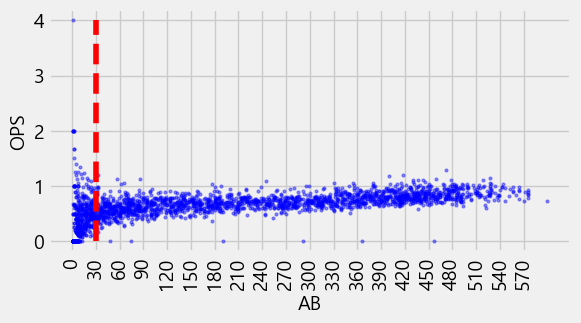

In [54]:
plt.figure(figsize=(6,3))
plt.plot('AB','OPS', data=regular_season_df, linestyle='none', marker='o', markersize=2, color='blue', alpha=0.4)
plt.xlabel('AB', fontsize=14)
plt.ylabel('OPS', fontsize=14)
plt.xticks(list(range(min(regular_season_df['AB']),max(regular_season_df['AB']),30)),rotation=90)
plt.vlines(30,ymin=min(regular_season_df['OPS']), ymax=max(regular_season_df['OPS']),linestyle='dashed',colors='r')
plt.show()

In [55]:
result=result[result['타수']>=30]

In [56]:
result.head()

,ID,이름,생일,팀,시즌,포지션,나이,G,타석,타수,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR+
0,0,이종범,1970-08-15,해,1994,SS,25,124.0,561.0,499.0,...,2.0,1.0,4.0,0.393,0.452,0.581,1.033,0.462,198.3,11.77
1,1,테임즈,1986-11-10,N,2015,1B,30,142.0,595.0,472.0,...,7.0,0.0,7.0,0.381,0.498,0.790,1.288,0.530,222.3,10.71
2,2,심정수,1975-05-05,현,2003,RF,29,133.0,601.0,460.0,...,14.0,0.0,8.0,0.335,0.478,0.720,1.197,0.498,210.7,10.19
3,0,이종범,1970-08-15,해,1997,SS,28,125.0,577.0,484.0,...,9.0,0.0,3.0,0.324,0.428,0.581,1.009,0.431,173.2,9.70
4,0,이종범,1970-08-15,해,1996,SS,27,113.0,525.0,449.0,...,4.0,0.0,2.0,0.332,0.425,0.566,0.991,0.440,184.6,9.52


### 파생피처 생성

#### 1루타 feature 생성

In [57]:
# 1루타 feature 생성
result['1타'] = result['안타'] - result['2타'] - result['3타'] - result['홈런']

In [58]:
# 사용 features 명시
infos = ['ID','이름','생일','팀','시즌','포지션','나이']
stats = ['G','타수','득점','안타','1타','2타','3타','홈런','루타','타점','도루','도실','볼넷','사구','고4','삼진'
        ,'병살','희타','희비','타율','출루','장타','OPS','wOBA','wRC+','WAR+']

#### 예측 전 시즌까지의 누적기록 피처 생성 [cum]

In [59]:
# 해당 시즌 이전까지의 누적 기록
def get_cumulative(player_id, season, stat=stats ,df=result):
    try:
        result_cum = df[(df['ID']==player_id) & (df['시즌'] < season)][stat]
        result_cum = result_cum.mean()
        
    except:
        result_cum = [np.nan for i in stat]
        result_cum = pd.Series(result_cum)
    
    return result_cum

In [60]:
# 모든 stats에 대한 누적 stat
stats_cum = [i + '_누적' for i in stats]

In [61]:
# 누적 stat 데이터프레임에 반영
result[stats_cum] = result.apply(lambda x: get_cumulative(x['ID'], x['시즌']), axis=1)

#### 직전 n년까지의 기록 피처 생성 [lag]

In [62]:
# lag stat (직전 몇년의 기록) => 직전 n년의 기록을 바탕으로 그 다음 년도의 기록을 예측하는 함수
def get_lag(player_id, season, lag, stat=stats, df=result):
    try:
        result_lag = df[(df['ID']==player_id)&(df['시즌'] == season-lag)][stat].values[0]
        result_lag = pd.Series(result_lag)
        
    except:
        result_lag = [np.nan for i in stat]
        result_lag = pd.Series(result_lag)
        
    return result_lag

In [63]:
# 직전 1,2,3년의 기록
stats_lag1 = [i + '_LAG1' for i in stats]
stats_lag2 = [i + '_LAG2' for i in stats]
stats_lag3 = [i + '_LAG3' for i in stats]

In [64]:
# lag1 => 직전 1년의 기록
result[stats_lag1] = result.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=1), axis=1)
# lag2 => 직전 2년의 기록
result[stats_lag2] = result.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=2), axis=1)
# lag3 => 직전 3년의 기록
result[stats_lag3] = result.apply(lambda x: get_lag(x['ID'],x['시즌'], lag=3), axis=1)

#### 정답 데이터셋 생성 [OPS_next]

OPS = 장타 + 출루

In [65]:
# 데이터 프레임의 정답 셋 만들기 위함 => 크롤링을 바탕으로 데이터 셋을 형성하였기에 자체적인 Target값을 생성

def get_next_year(player_id, season, stat=['장타','출루','OPS'],df=result):
    try:
        result = df[(df['ID']==player_id)&(df['시즌']==season+1)][stat].values[0]
        result = pd.Series(result)
    except:
        result = [np.nan for i in stat]
        result = pd.Series(result)
        
    return result

In [66]:
# 장타, 출루, OPS의 내년 기록
stats_next = [i + '_NEXT' for i in ['장타', '출루', 'OPS']]
result[stats_next] = result.apply(lambda x: get_next_year(x['ID'], x['시즌']), axis=1)

In [67]:
result.drop('ID',axis=1)

,이름,생일,팀,시즌,포지션,나이,G,타석,타수,득점,...,타율_LAG3,출루_LAG3,장타_LAG3,OPS_LAG3,wOBA_LAG3,wRC+_LAG3,WAR+_LAG3,장타_NEXT,출루_NEXT,OPS_NEXT
0,이종범,1970-08-15,해,1994,SS,25,124.0,561.0,499.0,113.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.586,0.397,0.983
1,테임즈,1986-11-10,N,2015,1B,30,142.0,595.0,472.0,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.679,0.427,1.106
2,심정수,1975-05-05,현,2003,RF,29,133.0,601.0,460.0,110.0,...,0.304,0.400,0.551,0.951,0.413,149.9,5.31,0.480,0.385,0.864
3,이종범,1970-08-15,해,1997,SS,28,125.0,577.0,484.0,112.0,...,0.393,0.452,0.581,1.033,0.462,198.3,11.77,NaN,NaN,NaN
4,이종범,1970-08-15,해,1996,SS,27,113.0,525.0,449.0,94.0,...,0.280,0.331,0.432,0.762,0.350,127.4,6.14,0.581,0.428,1.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8552,조동화,1981-03-22,S,2009,RF,29,102.0,191.0,169.0,22.0,...,0.201,0.266,0.281,0.547,0.246,45.7,-0.22,0.316,0.332,0.648
8553,김영진,1972-04-09,삼,1999,C,28,97.0,212.0,189.0,8.0,...,0.134,0.178,0.161,0.339,0.163,-5.3,-0.86,NaN,NaN,NaN
8554,나종덕,1998-03-16,롯,2018,C,21,106.0,203.0,177.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8555,이종범,1970-08-15,K,2007,RF,38,84.0,282.0,253.0,23.0,...,0.260,0.350,0.422,0.772,0.349,106.2,4.27,0.379,0.348,0.727


In [68]:
result.columns

Index(['ID', '이름', '생일', '팀', '시즌', '포지션', '나이', 'G', '타석', '타수',
       ...
       '타율_LAG3', '출루_LAG3', '장타_LAG3', 'OPS_LAG3', 'wOBA_LAG3', 'wRC+_LAG3',
       'WAR+_LAG3', '장타_NEXT', '출루_NEXT', 'OPS_NEXT'],
      dtype='object', length=141)

---------------------------------------

# 5. 모델링

In [69]:
# 출력 할 때 마다, 기존 출력물들은 제거해주는 모듈
from IPython.display import clear_output

In [70]:
# 모델 모듈
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostClassifier

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [71]:
df = result.fillna(-1)
df = df[df['OPS_NEXT'] > 0] # 다음 해의 OPS가 존재하는 값들만 추출 (다음 해 OPS 가 없다면, predict 값과 target값을 비교 할 수 없기 때문)

In [72]:
df = pd.concat([df, pd.get_dummies(df['포지션'], drop_first=True)], axis=1) # 포지션 dummy variable로 변환

## 학습데이터 준비

In [73]:
# 사용 features 명시
infos = ['ID','이름','생일','팀','시즌','포지션','나이']
stats = ['G','타수','득점','안타','1타','2타','3타','홈런','루타','타점','도루','도실','볼넷','사구','고4','삼진'
        ,'병살','희타','희비','타율','출루','장타','OPS']

In [74]:
# 누적 및 lag stat features 이름
stats_cum = [i + '_누적' for i in stats]
stats_lag1 = [i + '_LAG1' for i in stats]
stats_lag2 = [i + '_LAG2' for i in stats]
stats_lag3 = [i + '_LAG3' for i in stats]

In [75]:
stats_position = ['2B', '3B', 'C', 'CF', 'DH', 'LF', 'RF', 'SS']
X_cols = stats + stats_cum + stats_lag1 + stats_lag2 + stats_position + ['나이']
y_cols = ['OPS_NEXT']

In [76]:
# 학습시킬 모델
model_dict = {'xgb':XGBRegressor(),
              'lgbm':LGBMRegressor(),
              'rf':RandomForestRegressor(),
              'ridge':Ridge(),
              'lasso':Lasso(),
              'catboost':CatBoostClassifier()
             }

## 적합한모델 찾기

총 6개의 머신러닝 모델을 선택하여 검증세트를 통해 가장 좋은 점수를 가진 모델을 찾는 과정을 진행하였습니다.

catboost는 너무 오랜시간이 걸려 다른 파일에 별도로 학습을 진행하였고,

학습결과 ridge가 가장 좋은 점수를 나타내어 ridge모델로 선택하였습니다.

In [77]:
# 2009 ~ 2016년 기간의 데이터로 검증
# 예를들어 2010년은 2009년까지의 데이터로, 2011년은 2010년까지의 데이터로 검증
test_error = []
r2 = []

for year in range(2010, 2018):

    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]
    
    model = model_dict['xgb']
    weight = train['타수']
    model.fit(X_train, y_train, sample_weight=weight)
    y_predict = model.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    r2.append(r2_score(y_test, y_predict))
    
    clear_output(wait=True)
    print(year, ": 완료")
    
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(r2))
print("완료")

2017 : 완료
test error :  0.11438131397656859
test std :  0.009396880004579352
r2 :  0.15144217745884514
완료


In [78]:
test_error = []
r2 = []

for year in range(2010, 2018):

    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]
    
    model = model_dict['lgbm']
    weight = train['타수']
    model.fit(X_train, y_train, sample_weight=weight)
    y_predict = model.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    r2.append(r2_score(y_test, y_predict))
    
    clear_output(wait=True)
    print(year, ": 완료")
    
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(r2))
print("완료")

2017 : 완료
test error :  0.10581836828830188
test std :  0.010450180726986467
r2 :  0.2991709321888907
완료


In [79]:
test_error = []
r2 = []

for year in range(2010, 2018):

    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]
    
    model = model_dict['lasso']
    weight = train['타수']
    model.fit(X_train, y_train, sample_weight=weight)
    y_predict = model.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    r2.append(r2_score(y_test, y_predict))
    
    clear_output(wait=True)
    print(year, ": 완료")
    
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(r2))
print("완료")

2017 : 완료
test error :  0.11252964877851226
test std :  0.01458948135519988
r2 :  0.22182791576623268
완료


In [80]:
test_error = []
r2 = []

for year in range(2010, 2018):

    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]
    
    model = model_dict['rf']
    weight = train['타수']
    model.fit(X_train, y_train, sample_weight=weight)
    y_predict = model.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    r2.append(r2_score(y_test, y_predict))
    
    clear_output(wait=True)
    print(year, ": 완료")
    
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(r2))
print("완료")

2017 : 완료
test error :  0.10574838365145109
test std :  0.01185664446419323
r2 :  0.2917985493963351
완료


In [81]:
test_error = []
r2 = []

for year in range(2010, 2018):

    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]
    
    model = model_dict['ridge']
    weight = train['타수']
    model.fit(X_train, y_train, sample_weight=weight)
    y_predict = model.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    r2.append(r2_score(y_test, y_predict))
    
    clear_output(wait=True)
    print(year, ": 완료")
    
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(r2))
print("완료")

2017 : 완료
test error :  0.10558163906620478
test std :  0.011147936722301492
r2 :  0.3034234827516409
완료


### 그리드 서치 진행

가장 좋게 결과가나온 ridge와 xgboost 두개를 그리드 서치를 진행해보았는데,

ridge의 경우 파라미터가 크게 있지 않아, xgboost만 적용하여 그리드 서치 진행하였습니다.

In [82]:
'''
from sklearn.model_selection import KFold, GridSearchCV
model=model_dict['xgb']
param_grid={    'n_estimators' : [100,200,300,],
    'learning_rate' : [0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9]}

X_train = train[X_cols]
y_train = train[y_cols]

cv=KFold(n_splits=6)

gcv=GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1)
gcv.fit(X_train,y_train)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
'''

"\nfrom sklearn.model_selection import KFold, GridSearchCV\nmodel=model_dict['xgb']\nparam_grid={    'n_estimators' : [100,200,300,],\n    'learning_rate' : [0.05,0.1,0.15],\n    'max_depth' : [3,5,7,10,15],\n    'gamma' : [0,1,2,3],\n    'colsample_bytree' : [0.8,0.9]}\n\nX_train = train[X_cols]\ny_train = train[y_cols]\n\ncv=KFold(n_splits=6)\n\ngcv=GridSearchCV(model, param_grid=param_grid, cv=cv, n_jobs=-1)\ngcv.fit(X_train,y_train)\nprint('final params', gcv.best_params_)   # 최적의 파라미터 값 출력\n"

In [83]:
#{'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
test_error = []
r2 = []

for year in range(2010, 2018):

    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]
    
    model = XGBRegressor(colsample_bytree=0.9, gamma=0, learning_rate= 0.05, max_depth= 3, n_estimators= 100)
    weight = train['타수']
    model.fit(X_train, y_train, sample_weight=weight)
    y_predict = model.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    r2.append(r2_score(y_test, y_predict))
    
    clear_output(wait=True)
    print(year, ": 완료")
    
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(r2))
print("완료")

2017 : 완료
test error :  0.10406513584240384
test std :  0.012115162725079606
r2 :  0.32114570861573477
완료


## 최종모델 선정

그리드 서치를 진행한 xgboost가 ridge보다 좋은 성능을 나타내어 최종 모델로 선정하였습니다.

In [84]:
test_error = []
r2 = []

for year in range(2010, 2018):

    train = df[df['시즌'] < year-1].reset_index(drop=True)
    test = df[df['시즌'] == year-1].reset_index(drop=True)
    
    X_train = train[X_cols]
    y_train = train[y_cols]

    X_test = test[X_cols]
    y_test = test[y_cols]
    
    model = XGBRegressor(colsample_bytree=0.9, gamma=0, learning_rate= 0.05, max_depth= 3, n_estimators= 100)
    weight = train['타수']
    model.fit(X_train, y_train, sample_weight=weight)
    y_predict = model.predict(X_test)
    
    test_error.append(mean_squared_error(y_test, y_predict, sample_weight=X_test['타수']) ** 0.5)
    r2.append(r2_score(y_test, y_predict))
    
    clear_output(wait=True)
    print(year, ": 완료")
    
    
print("test error : ", np.mean(test_error))
print("test std : ", np.std(test_error))
print("r2 : ", np.mean(r2))
print("완료")

2017 : 완료
test error :  0.10406513584240384
test std :  0.012115162725079606
r2 :  0.32114570861573477
완료


In [85]:
# 연도별 테스트 에러
test_error

[0.09950521069316848,
 0.08906605206341402,
 0.09717027834523412,
 0.0911121667561961,
 0.12717174186790847,
 0.11376068760210288,
 0.11299790956151215,
 0.10173703984969462]

(0.0, 1.5)

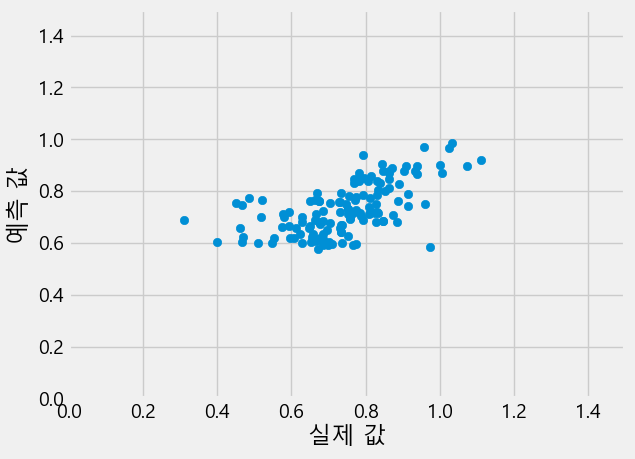

In [86]:
# 예측값과 실제값의 시각화
plt.scatter(y_test, y_predict)
plt.xlabel("실제 값")
plt.ylabel("예측 값")
plt.xlim(0,1.5)
plt.ylim(0,1.5)

In [87]:
predict = result[result['시즌']==2018] # 2018년도 데이터 프레임
predict = pd.concat([predict, pd.get_dummies(predict['포지션'], drop_first=True)], axis=1) # 포지션 dummy variable로 변환

In [88]:
# Dacon regular season과 submission 병합
# 추후 statiz data와 병합할 때 기준이 되는 생일 데이터를 얻기 위함
reg_sub = pd.merge(submission, reg[reg['year']==2018], on='batter_id', how='left', suffixes=['','_reg'])

In [89]:
# regular season dataframe의 생일 데이터를 statiz와 일치시킴
reg_sub['year_born'] = reg_sub['year_born'].apply(lambda x: datetime.strptime(x, "%Y년 %m월 %d일").date())
reg_sub['year_born'] = reg_sub['year_born'].astype(str)

In [90]:
# 필요한 feature만 남김
reg_sub = reg_sub[['batter_name', 'year_born', 'batter_id']]

In [91]:
# 이름과 생일을 기준으로 dacon data와 statiz data 병합
total = pd.merge(reg_sub, predict, how='left', left_on=['batter_name', 'year_born'], right_on=['이름', '생일'])

In [92]:
X = total[X_cols] # 사용 feature
X = X.fillna(-1) # NA값 -1로 impute

In [93]:
# 예측
total['y_hat'] = model.predict(X)

In [94]:
# 타자별 예측값 feature에 저장
submission['OPS'] = submission['batter_id'].apply(lambda x: total[total['batter_id']==x]['y_hat'].values[0])

In [95]:
submission

,batter_id,batter_name,OPS
0,1,강경학,0.686315
1,2,강구성,0.617610
2,3,강민국,0.617610
3,4,강민호,0.833082
4,5,강백호,0.851377
...,...,...,...
215,337,홍재호,0.643565
216,338,홍창기,0.617610
217,341,황윤호,0.597711
218,342,황재균,0.806982


## 반발계수의 변화

In [96]:
#시즌별 전체 OBP 계산(30타수 이상인 선수들의 기록만 이용)
season_OBP=result.loc[result['타수']>=30].groupby('시즌').agg({'타수':'sum','안타':'sum','볼넷':'sum','사구':'sum','희비':'sum'}).reset_index()
season_OBP['OBP']=season_OBP[['안타','볼넷','사구']].sum(axis=1)/ season_OBP[['타수','볼넷','사구','희비']].sum(axis=1)

#시즌별 전체 SLG 계산(30타수 이상인 선수들만의 기록만 사용)
season_SLG=result.loc[result['타수']>=30].groupby('시즌').agg({'타수':'sum','안타':'sum','2타':'sum','3타':'sum','홈런':'sum'}).reset_index()
season_SLG['SLG']=((season_SLG['안타']- season_SLG[['2타','3타','홈런']].sum(axis=1))+\
                  season_SLG['2타']*2+season_SLG['3타']*3+season_SLG['홈런']*4)/season_SLG['타수']

#season_OBP와season_SLG 병합 후 season_OPS를 생성해 계산
season_OPS=pd.merge(season_OBP[['시즌','OBP']], season_SLG[['시즌','SLG']], on='시즌')
season_OPS['OPS']=season_OBP['OBP']+season_SLG['SLG']

#시즌별 전체 홈런 수와 한 선수당 평균 홈런 수 계산
season_HR=result.loc[result['타수']>=30].groupby('시즌').agg({'홈런':['sum','mean','count']}).reset_index()
season_HR.columns=['시즌','sum_HR','mean_HR','count']

#기존의 OPB 데이터셋과 병합
season_OPS=season_OPS.merge(season_HR, on='시즌', how='left')
display(season_OPS)

,시즌,OBP,SLG,OPS,sum_HR,mean_HR,count
0,1982,0.339275,0.391818,0.731092,361.0,4.056180,89
1,1983,0.324362,0.370374,0.694736,403.0,4.242105,95
2,1984,0.327474,0.367396,0.694870,380.0,3.551402,107
3,1985,0.333540,0.377431,0.710971,450.0,4.245283,106
4,1986,0.323494,0.353649,0.677142,394.0,3.126984,126
5,1987,0.336757,0.368144,0.704901,384.0,3.072000,125
6,1988,0.337664,0.381363,0.719027,477.0,3.641221,131
7,1989,0.336828,0.361784,0.698612,450.0,3.191489,141
8,1990,0.340159,0.373203,0.713361,537.0,3.977778,135
9,1991,0.338394,0.383900,0.722293,709.0,4.431250,160


In [97]:
# 2000년도 이전의 데이터 수가 충분치 않아 고려하지 않는다
season_OPS.loc[season_OPS['시즌']>2000]

#2018년의 평균 홈런 개수를 시즌별평균 홈런 수에서 뺀다
season_OPS['HR_diff']=season_OPS['mean_HR']-season_OPS['mean_HR'].iloc[-1]
difference=season_OPS.sort_values(by='HR_diff')[['시즌','OPS','HR_diff']]
display(difference.reset_index(drop=True).head(40))

,시즌,OPS,HR_diff
0,1987,0.704901,-6.220553
1,1986,0.677142,-6.165569
2,1989,0.698612,-6.101064
3,1984,0.694870,-5.741151
4,1993,0.672474,-5.687290
5,1988,0.719027,-5.651332
6,2012,0.704173,-5.325021
7,1990,0.713361,-5.314775
8,1982,0.731092,-5.236373
9,1994,0.703623,-5.069623


2018vs2010년 비교시, OPS는 0.047, 홈런은 2.7개 차이나는 것을 확인했다.
2019상반기 시즌 평균 홈런개수 차이는 약 2.4개 차이나므로
2.4*0.047/2.7=0.0417778 의 OPS하락이 있을것으로 예측

In [98]:
submission['OPS'] =submission['OPS']-0.042
submission

,batter_id,batter_name,OPS
0,1,강경학,0.644315
1,2,강구성,0.575610
2,3,강민국,0.575610
3,4,강민호,0.791082
4,5,강백호,0.809377
...,...,...,...
215,337,홍재호,0.601565
216,338,홍창기,0.575610
217,341,황윤호,0.555711
218,342,황재균,0.764982


(0.0, 1.5)

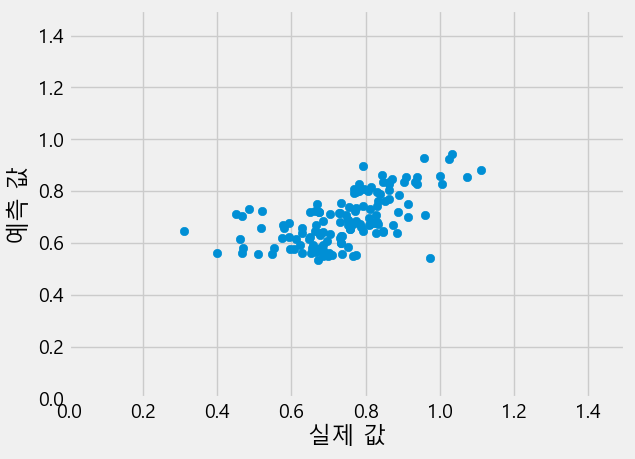

In [99]:
# 예측값과 실제값의 시각화
plt.scatter(y_test, y_predict-0.042)
plt.xlabel("실제 값")
plt.ylabel("예측 값")
plt.xlim(0,1.5)
plt.ylim(0,1.5)

## 평가지표 및 점수확인

In [100]:
def wrmse(v,w,p):
    #v : 실제값
    #w : 타수 
    #p : 예측값
    return np.sqrt(sum((v-p)**2*w)/sum(w))

크롤링한 데이터와 예측한 데이터를 비교하여 컬럼을 맞추는 작업을함

2018년까지 경기를 뛰었으나 2019년에 은퇴하였거나 경기를 진행하지 않은 경우 제외함

In [101]:
OPS_2019=pd.read_csv("OPS_2019.csv")

In [102]:
OPS_2019[~np.isin(OPS_2019['이름'], submission['batter_name'])]

,Unnamed: 0,이름,real_OPS,타수,pred_OPS


In [103]:
OPS_2019

,Unnamed: 0,이름,real_OPS,타수,pred_OPS
0,106,강경학,0.615,113,0.603724
1,102,강민국,0.615,88,0.530056
2,55,강민호,0.719,346,0.743474
3,8,강백호,0.913,437,0.770077
4,305,강승호,0.503,39,0.524984
...,...,...,...,...,...
182,252,홍재호,0.461,19,0.554126
183,147,홍창기,0.584,23,0.530056
184,95,황윤호,0.724,123,0.512166
185,15,황재균,0.825,447,0.763081


In [104]:
OPS_2019=OPS_2019[OPS_2019['타수']>=30]
OPS_2019

,Unnamed: 0,이름,real_OPS,타수,pred_OPS
0,106,강경학,0.615,113,0.603724
1,102,강민국,0.615,88,0.530056
2,55,강민호,0.719,346,0.743474
3,8,강백호,0.913,437,0.770077
4,305,강승호,0.503,39,0.524984
...,...,...,...,...,...
179,40,허경민,0.721,475,0.698070
180,347,허도환,0.405,79,0.530056
181,22,호잉,0.800,476,0.840178
184,95,황윤호,0.724,123,0.512166


In [105]:
wrmse(OPS_2019['real_OPS'],OPS_2019['타수'],OPS_2019['pred_OPS'])

0.09450706883649497